## A non-linear pendulum

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate # The 'scipy' package has a built-in differential equation solver in the 'integrate' module. We'll be importing it for use.

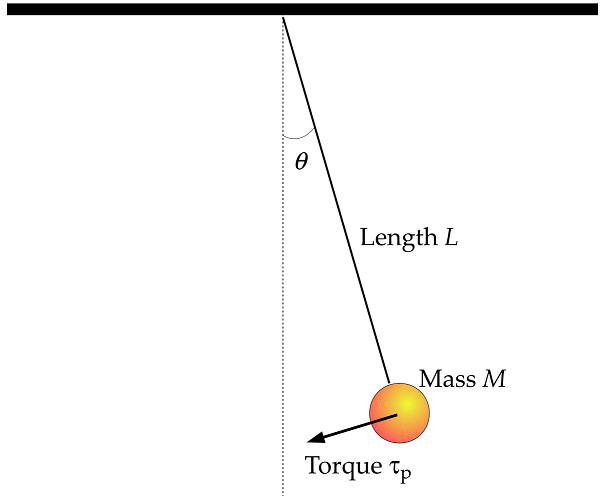

In [2]:
from IPython.display import Image # needed to embed an image
Image(filename='Pendulum.png', embed=True) # image downloadable from Moodle

The image above (download/view it from Moodle if it doesn't show up) shows a pendulum of length $L$ with a bob of mass $M$. We assume that all the mass of the system is in the bob, and that the system is rigid.

The pendulum experiences a torque
$$
  \tau_p = MgL \sin(\theta),
$$

and we also know that the torque of a rigid body is  given by

$$
  \tau = I \alpha,
$$

where $I$ is the moment of inertia and $\alpha$ the angular
acceleration. These are given by

$$
  I = ML^2 \qquad \text{and} \qquad  \alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2},
$$

where $\omega$ is the angular velocity.
We can then rewrite the equation for the torque in terms of the
angular position of the pendulum (note that a minus sign appears because the torque and the angle are measured in opposite directions):

$$
  \tau_p = - I \frac{d^2\theta}{dt^2}.
$$

Substituting and rearranging gives us the equation of motion for
the pendulum:

$$
  \frac{d^2\theta}{dt^2} = - \frac{MgL}{I} \sin(\theta) = - \frac{g}{L}
  \sin(\theta),
$$
 which tells us that the bob accelerates towards the rest point at $\theta = 0$, and that the acceleration is dependent on the sine of the angle of displacement.

Now, if we were solving this analytically, we'd be stuck - there's no exact analytical solution to this. We'd need to make an approximation in order to continue. The obvious one here is to use the small angle approximation, and put $\sin(\theta) \approx \theta$, which (as the name suggests) is only valid when $\theta$ is small. This transforms the problem into a linear ODE, which is simple to solve analytically, and gives familiar sinusoidal motion.

But by using our numerical methods, we can solve this system for big angles. We can separate out into two first-order equations, as before, where the two variables are now the angle $\theta$ (c.f. position $y$) and the angular velocity $\omega$ (c.f. y-velocity)

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

All of the above theory, equations and images used above was copied and pasted from the 'PHAS0029-C7-instructions.ipynb' jupyter notebook (In 17 to be more exact)

## System of first-order equations to be solved.

where the two variables are now the angle $\theta$ (c.f. position $y$) and the angular velocity $\omega$ (c.f. y-velocity)

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

In [3]:
def pendulum(t,r):
    '''Definition of the vector function to be solved for the motion of a non-linear pendulum with a bob of mass, M.
    Inputs:
    r: vector of 'angular position/angle' (r[0]) and 'angular velocity' (r[1])
    t: time points
    
    Outputs: an array of angle-position and angle-velocity values returned by the function
    '''
    
    theta = r[0] # first element of r represents angle position (theta)
    w = r[1] # second element of r represents angular velocity (w)
    
    f_theta = w                 #d(theta)/dt = w 
   
    f_w = -(g/L)*np.sin(theta)  #dw/dt = -(g/L)*sin(theta)
    
    return np.array([f_theta,f_w]) # convert f_theta and f_w to an array form
    

Now let's set up our system and solve it. We'll solve for a pendulum with $L = 1 \rm{m}$ released from rest at time $t = 0 {\rm s}$ for a duration of 20 seconds, with an initial angle (in radians) of $\theta = 0.99 \pi$ 

In [4]:
g = 9.8 # gravitational acceleration in m/s^2
L = 1   #length of pendulum, L = 1m

tstart = 0.0
tend = 20.0            # solve for a period of 20 seconds.
N = 1000              # number of points for Runge-Kutta
h = (tend - tstart)/N # calculate timestep for this number of points

tpoints = np.arange(tstart, tend, h)

# set up initial conditions
initial_theta = 0.99*np.pi # initial angle position (theta), in radians
initial_w = 0 #initial angular velocity (w),. in radians per second


r = np.array([initial_theta, initial_w])

In [5]:
def RungeKutta2d(r,tpoints,pendulum):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [theta_points, w_points]: solutions for angle(t) and w(t), numpy arrays of same length as tpoints'''
    
    
    theta_points = [] # initialise empty arrays
    w_points = []
    
    for t in tpoints:
        
        theta_points.append(r[0])
        w_points.append(r[1])
        
        #calling the specified function
        
        k1 = h*pendulum(t,r) 
        k2 = h*pendulum(t+0.5*h, r+0.5*k1)
        k3 = h*pendulum(t+0.5*h, r+0.5*k2)
        k4 = h*pendulum(t+h, r+k3)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([theta_points, w_points]) # convert output to numpy array with 2 rows and N columns
   

In [6]:
# this will be an array of the angle and angular velocity solutions to 
# the function specified in "pendulum()"
rsol = RungeKutta2d(r,tpoints,pendulum) 

print("shape of rsol:", np.shape(rsol))

shape of rsol: (2, 1000)


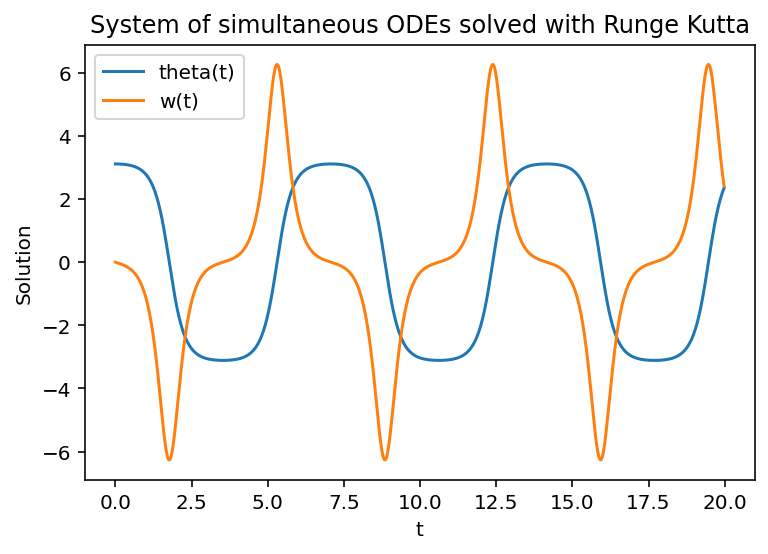

In [7]:
#Plotting the angle (theta) and the angular velocity (w) as a function of time on a single appropriately labelled plot. 

plt.figure()
plt.plot(tpoints,rsol[0],label="theta(t)") # the first row of rsol (angle, theta)
plt.plot(tpoints,rsol[1],label="w(t)") # the second row of rsol (angular velocity, w)
plt.legend(loc="best")
plt.title("System of simultaneous ODEs solved with Runge Kutta")
plt.xlabel("t")
plt.ylabel("Solution");

In [8]:
def pendulum_new(t,r):
    '''Definition of the vector function to be solved for the motion of a non-linear pendulum using the small angle approximation where sin(theta) = theta
    Inputs:
    r: vector of 'angular position/angle' (r[0]) and 'angular velocity' (r[1])
    t: time points
    
    Outputs: an array of angle-position and angle-velocity values returned by the function
    '''
    
    theta = r[0] # first element of r represents angle position (theta)
    w = r[1] # second element of r represents angular velocity (w)
    
    f_theta = w                 #d(theta)/dt = w 
   
    f_w = -(g/L)*(theta)  #dw/dt = -(g/L)*(theta)
    
    return np.array([f_theta,f_w]) # convert f_theta and f_w to an array form
    

In [14]:
# set up initial conditions
initial_w = 0 #initial angular velocity (w),. in radians per second

initial_theta_1 = 0.2 # initial angle position (theta), in radians (for theta close to 0)

initial_theta_2 = 1.6 # initial angle position (theta), in radians (for a value of theta close to between 0 to 0.99*pi)

initial_theta_3 = 2.9 # initial angle position (theta), in radians (for a value of theta close 0.99*pi)

r1 = np.array([initial_theta_1, initial_w])
rsolution1 = RungeKutta2d(r1,tpoints,pendulum_new) 

r2 = np.array([initial_theta_2, initial_w])
rsolution2 = RungeKutta2d(r2,tpoints,pendulum_new) 

r3 = np.array([initial_theta_3, initial_w])
rsolution3 = RungeKutta2d(r3,tpoints,pendulum_new) 



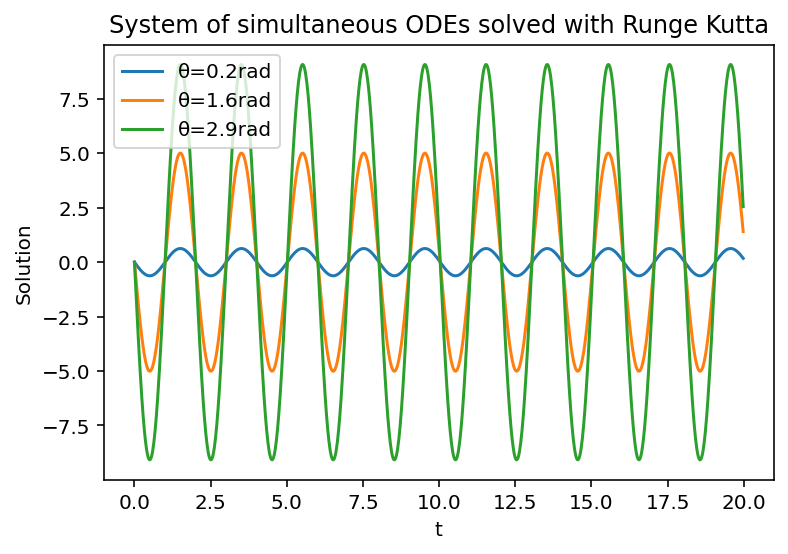

In [15]:
#Plotting the angle (theta) and the angular velocity (w) as a function of time on a single appropriately labelled plot. 
#Plotting for theta (θ) close to 0
#Plotting for theta (θ) close to between 0 to 0.99π
#Plotting for theta (θ) close 0.99π

plt.figure()

plt.plot(tpoints,rsolution1[1],label="θ=0.2rad") # the second row of rsol (angular velocity, w) #Plotting for theta (θ) close to 0
plt.plot(tpoints,rsolution2[1],label="θ=1.6rad") # the second row of rsol (angular velocity, w) #Plotting for theta (θ) close to between 0 to 0.99π
plt.plot(tpoints,rsolution3[1],label="θ=2.9rad") # the second row of rsol (angular velocity, w) #Plotting for theta (θ) close 0.99π

plt.legend(loc="best")
plt.title("System of simultaneous ODEs solved with Runge Kutta")
plt.xlabel("t")
plt.ylabel("Solution");
